In [1]:
import pandas as pd
import numpy as np
from pydataset import data
import os
import explore as e

from sklearn.model_selection import train_test_split

#Stats imports
from scipy import stats
from scipy.stats import pearsonr, spearmanr, ttest_1samp, ttest_ind, chi2_contingency


#visual imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scalers
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# modeling method
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Acquire Data from csv
df = pd.read_csv('wine.csv')
df.head(3)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0


In [3]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  color                 6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


In [4]:
# Value counts for Quality
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [5]:
# Normalizing column names
df.columns = df.columns.str.replace(' ', '_')

In [6]:
# Drop Unnamed column
df.drop(['Unnamed:_0'], axis=1, inplace=True)

In [7]:
# Rename color to color_red
df.rename(columns={'color':'color_red'}, inplace=True)

In [8]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [9]:
# Describe
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Sulphates: 
- Protecting against oxidation, which can affect the color and taste of wine
- Preventing the growth of unwanted microorganisms
- Preserving the desired color
- Promoting the growth of yeast for better fermentation
- Improving the release of desirable compounds from the skin and seeds of the grapes

# Split Data

In [10]:
# Split Data
def split_data(df, target= 'enter target column here'):
    ''' 
        This function is the train, validate, test, function.
        1. First we create the TRAIN and TEST dataframes at an 0.80 train_size( or test_size 0.2).

        2. Second, use the newly created TRAIN dataframe and split that at a 0.70 train_size
        ( or test_size 0.3), which means 70% of the train dataframe, so 56% of all the data.

        Now we have a train, validate, and test dataframes

    '''
    train, test = train_test_split(df, train_size=0.8, random_state=123, stratify=df[target])
    train, validate = train_test_split(train, train_size = 0.7, random_state = 123, stratify=train[target])
    return train, validate, test

In [11]:
train, val, test = split_data(df, target='quality')

In [12]:
# Shapes
train.shape, val.shape, test.shape

((3637, 13), (1560, 13), (1300, 13))

# Explore

In [13]:
# Deep Copy for scaling
scaled_train = train.copy()
scaled_train.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red
2002,7.6,0.17,0.35,1.6,0.047,43.0,154.0,0.99340,3.36,0.69,11.1,6,0
2873,5.8,0.21,0.32,1.6,0.045,38.0,95.0,0.98946,3.23,0.94,12.4,8,0


In [14]:
# Correlations Table
round(train.corr(),4)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red
fixed_acidity,1.0000,0.2273,0.3377,-0.1138,0.3132,-0.2853,-0.3228,0.4474,-0.2515,0.3209,-0.0830,-0.0664,0.4790
volatile_acidity,0.2273,1.0000,-0.3683,-0.1953,0.3830,-0.3648,-0.4212,0.2807,0.2606,0.2357,-0.0367,-0.2600,0.6587
citric_acid,0.3377,-0.3683,1.0000,0.1631,0.0259,0.1351,0.1993,0.1096,-0.3328,0.0539,-0.0051,0.0838,-0.1831
residual_sugar,-0.1138,-0.1953,0.1631,1.0000,-0.1301,0.4199,0.4961,0.5574,-0.2619,-0.1884,-0.3508,-0.0513,-0.3463
chlorides,0.3132,0.3830,0.0259,-0.1301,1.0000,-0.2135,-0.2949,0.3713,0.0590,0.3948,-0.2461,-0.1880,0.5294
free_sulfur_dioxide,-0.2853,-0.3648,0.1351,0.4199,-0.2135,1.0000,0.7224,0.0325,-0.1570,-0.1900,-0.1909,0.0554,-0.4813
total_sulfur_dioxide,-0.3228,-0.4212,0.1993,0.4961,-0.2949,0.7224,1.0000,0.0367,-0.2434,-0.2725,-0.2751,-0.0537,-0.6959
density,0.4474,0.2807,0.1096,0.5574,0.3713,0.0325,0.0367,1.0000,0.0210,0.2686,-0.6722,-0.3062,0.3855
pH,-0.2515,0.2606,-0.3328,-0.2619,0.0590,-0.1570,-0.2434,0.0210,1.0000,0.1811,0.1119,0.0194,0.3347
sulphates,0.3209,0.2357,0.0539,-0.1884,0.3948,-0.1900,-0.2725,0.2686,0.1811,1.0000,-0.0022,0.0455,0.4988


**Positive Corr:**

- Citric Acid - 0.0838	
- Free Sulfur Dioxide - 0.0554
- pH - 0.0194	
- Sulphates - 0.0455
- alcohol - 0.4468	

**Negative Corr:** 

- Fixed Acidity - -0.0664		
- Volatile Acidity - -0.2600	
- Residual Sugar - -0.0513	
- Chlorides - 	-0.1880	
- Total Sulur Dioxide - -0.0537	
- Density - -0.3062	

In [15]:
correlation = train.corr()

correlation.quality.sort_values()

density                -0.306230
volatile_acidity       -0.259962
chlorides              -0.187964
color_red              -0.109482
fixed_acidity          -0.066437
total_sulfur_dioxide   -0.053740
residual_sugar         -0.051286
pH                      0.019410
sulphates               0.045466
free_sulfur_dioxide     0.055449
citric_acid             0.083779
alcohol                 0.446831
quality                 1.000000
Name: quality, dtype: float64

## Targets: Alcohol, Volatile Acidity, Chlorides, Density

### Scale Data

In [16]:
scaled_train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red
2002,7.6,0.17,0.35,1.6,0.047,43.0,154.0,0.99340,3.36,0.69,11.100000,6,0
2873,5.8,0.21,0.32,1.6,0.045,38.0,95.0,0.98946,3.23,0.94,12.400000,8,0
4636,6.5,0.51,0.25,1.7,0.048,39.0,177.0,0.99212,3.28,0.57,10.566667,5,0


In [17]:
# Scaler Object
mm = MinMaxScaler()

# Fit and Transform
scaled_train[['alcohol', 'volatile_acidity', 'chlorides', 'density']] =\
mm.fit_transform(scaled_train[['alcohol', 'volatile_acidity', 'chlorides', 'density']])

# head of df
scaled_train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red
2002,7.6,0.072,0.35,1.6,0.058431,43.0,154.0,0.115981,3.36,0.69,0.449275,6,0
2873,5.8,0.104,0.32,1.6,0.055092,38.0,95.0,0.039566,3.23,0.94,0.637681,8,0
4636,6.5,0.344,0.25,1.7,0.060100,39.0,177.0,0.091156,3.28,0.57,0.371981,5,0


### KMeans

#### Four Features

In [18]:
X = scaled_train[['alcohol', 'volatile_acidity', 'chlorides', 'density']]
X.head(3)

,alcohol,volatile_acidity,chlorides,density
2002,0.449275,0.072,0.058431,0.115981
2873,0.637681,0.104,0.055092,0.039566
4636,0.371981,0.344,0.060100,0.091156


In [19]:
# Model Object
km = KMeans(n_clusters=3)

# Fit Model
km.fit(X)

# Predictions
X['scaled_preds'] = km.predict(X)

X.head(3)

,alcohol,volatile_acidity,chlorides,density,scaled_preds
2002,0.449275,0.072,0.058431,0.115981,2
2873,0.637681,0.104,0.055092,0.039566,2
4636,0.371981,0.344,0.060100,0.091156,1


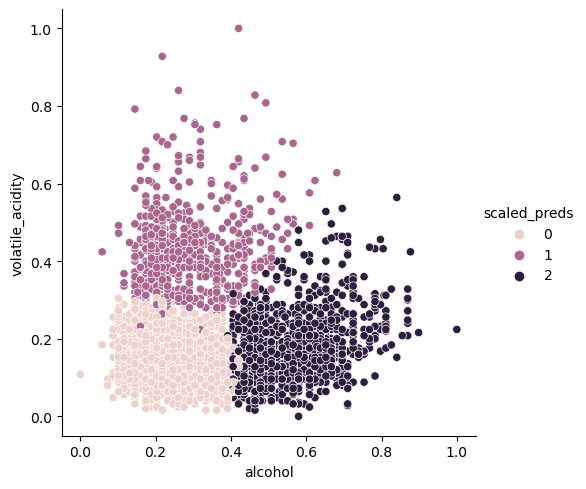

In [20]:
sns.relplot(x='alcohol', y='volatile_acidity', data=X, hue='scaled_preds')

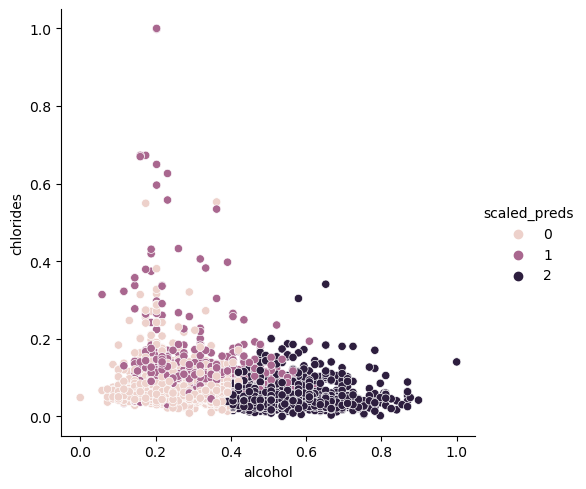

In [21]:
sns.relplot(x='alcohol', y='chlorides', data=X, hue='scaled_preds')

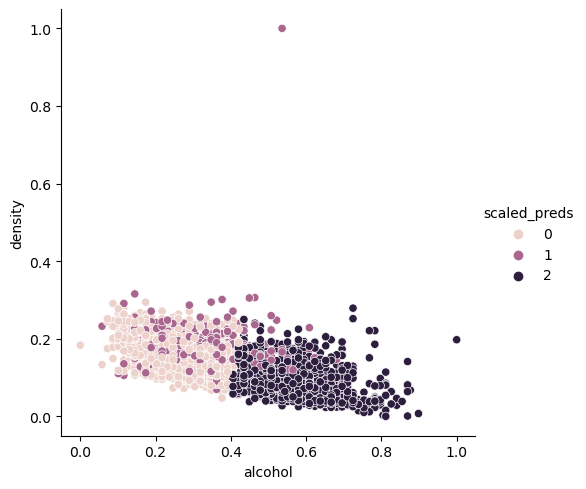

In [22]:
sns.relplot(x='alcohol', y='density', data=X, hue='scaled_preds')

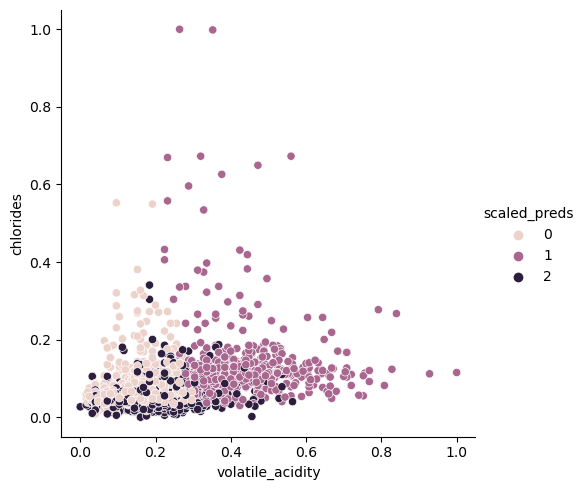

In [23]:
sns.relplot(x='volatile_acidity', y='chlorides', data=X, hue='scaled_preds')

#### Density/ Chlorides

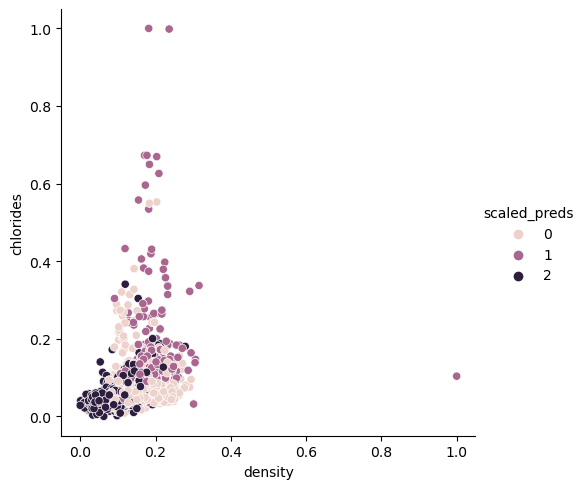

In [24]:
sns.relplot(x='density', y='chlorides', data=X, hue='scaled_preds')

#### Vol. Acid / Density

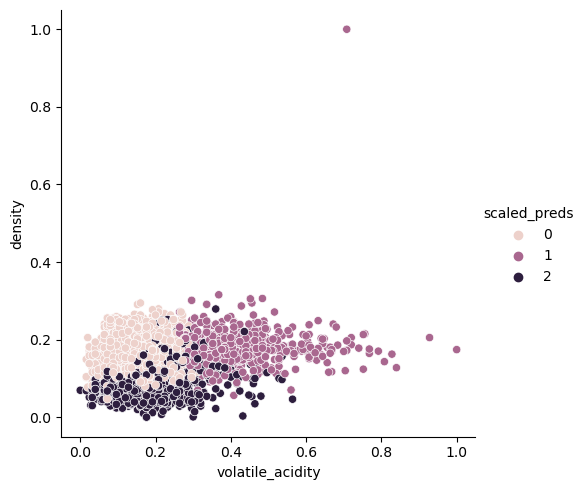

In [25]:
sns.relplot(x='volatile_acidity', y='density', data=X, hue='scaled_preds')

In [26]:
# Inertia

'alcohol', 'volatile_acidity', 'chlorides', 'density'


inertia = [] 

seed = 123

for n in range(1,11):
    
    km = KMeans(n_clusters=n, random_state=seed)
    
    km.fit(X[['alcohol', 'volatile_acidity', 'chlorides', 'density']])
    
    inertia.append(km.inertia_)


In [27]:
inertia_df = pd.DataFrame({'n_clusters': list(range(1,11)), 'inertia': inertia})
inertia_df.head(5)

,n_clusters,inertia
0,1,197.086347
1,2,112.111836
2,3,74.206086
3,4,57.594243
4,5,50.970750


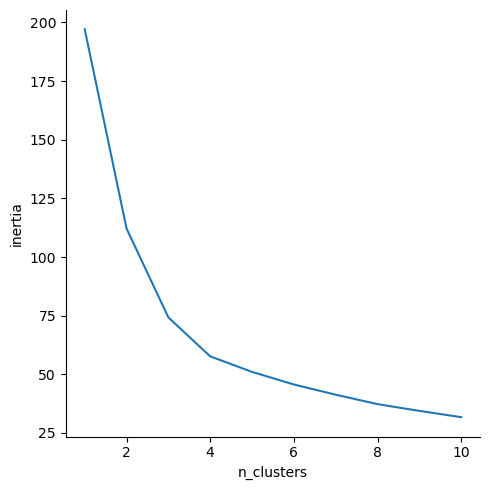

In [28]:
sns.relplot(x='n_clusters', y='inertia', data=inertia_df, kind='line')

**Three clusters is the most acute**

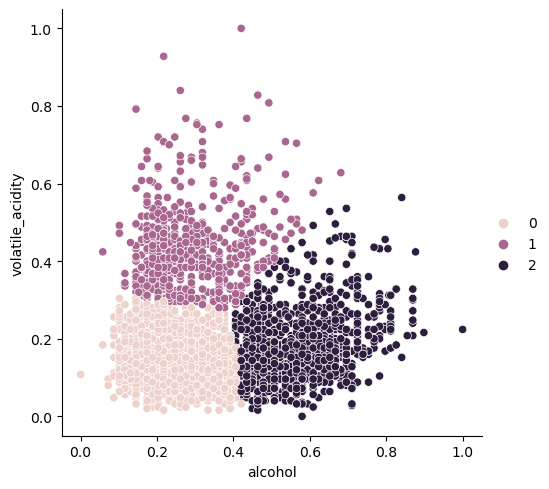

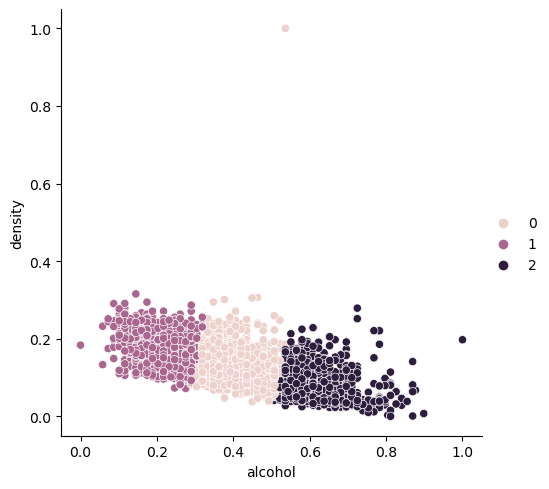

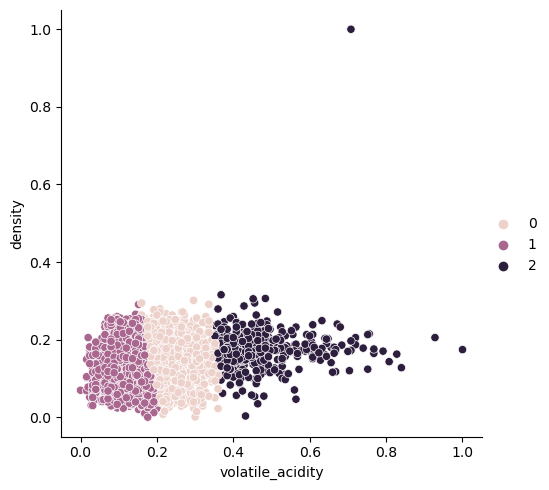

In [29]:
e.plot_clusters(X, 'alcohol', 'volatile_acidity', 'density')
plt.show()

# Questions
1. The proportion of acid to (alcohol + sugar) affects quality
2. White and red wines’ quality is different
3. The proportion of acid to chlorides affects quality
4. Density affects the quality of wine

In [30]:
train_s = train.copy()

train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red
2002,7.6,0.17,0.35,1.6,0.047,43.0,154.0,0.99340,3.36,0.69,11.100000,6,0
2873,5.8,0.21,0.32,1.6,0.045,38.0,95.0,0.98946,3.23,0.94,12.400000,8,0
4636,6.5,0.51,0.25,1.7,0.048,39.0,177.0,0.99212,3.28,0.57,10.566667,5,0


In [31]:
mm = MinMaxScaler()

train_s[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide',\
        'total_sulfur_dioxide','density','pH','sulphates','alcohol','color_red']] = mm.fit_transform(train_s[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide',\
        'total_sulfur_dioxide','density','pH','sulphates','alcohol','color_red']])

In [32]:
train_s.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red
2002,0.290598,0.072,0.210843,0.015337,0.058431,0.323077,0.410541,0.115981,0.488189,0.264045,0.449275,6,0.0
2873,0.136752,0.104,0.192771,0.015337,0.055092,0.284615,0.246879,0.039566,0.385827,0.404494,0.637681,8,0.0
4636,0.196581,0.344,0.150602,0.016871,0.060100,0.292308,0.474341,0.091156,0.425197,0.196629,0.371981,5,0.0
3,0.256410,0.120,0.192771,0.121166,0.076795,0.353846,0.499307,0.158650,0.354331,0.101124,0.275362,6,0.0
2169,0.273504,0.088,0.180723,0.187117,0.068447,0.365385,0.618585,0.216835,0.314961,0.151685,0.159420,7,0.0


In [33]:
# Avg acidity column
train_s['avg_acid'] = (train_s.fixed_acidity + train_s.volatile_acidity + train_s.citric_acid).mean()
train_s.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red,avg_acid
2002,0.290598,0.072,0.210843,0.015337,0.058431,0.323077,0.410541,0.115981,0.488189,0.264045,0.449275,6,0.0,0.65502
2873,0.136752,0.104,0.192771,0.015337,0.055092,0.284615,0.246879,0.039566,0.385827,0.404494,0.637681,8,0.0,0.65502
4636,0.196581,0.344,0.150602,0.016871,0.060100,0.292308,0.474341,0.091156,0.425197,0.196629,0.371981,5,0.0,0.65502


In [34]:
train_s['alc_sugar'] = (train_s.alcohol + train_s.residual_sugar).mean()
train_s.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red,avg_acid,alc_sugar
2002,0.290598,0.072,0.210843,0.015337,0.058431,0.323077,0.410541,0.115981,0.488189,0.264045,0.449275,6,0.0,0.65502,0.43784
2873,0.136752,0.104,0.192771,0.015337,0.055092,0.284615,0.246879,0.039566,0.385827,0.404494,0.637681,8,0.0,0.65502,0.43784
4636,0.196581,0.344,0.150602,0.016871,0.060100,0.292308,0.474341,0.091156,0.425197,0.196629,0.371981,5,0.0,0.65502,0.43784


In [35]:
train_s = e.add_exploration_columns(train_s)
train_s.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red,avg_acid,alc_sugar,acid_alc_sugar,acid_chlor
2002,0.290598,0.072,0.210843,0.015337,0.058431,0.323077,0.410541,0.115981,0.488189,0.264045,0.449275,6,0.0,0.65502,0.43784,0.822824,3.271348
2873,0.136752,0.104,0.192771,0.015337,0.055092,0.284615,0.246879,0.039566,0.385827,0.404494,0.637681,8,0.0,0.65502,0.43784,0.442584,2.623034
4636,0.196581,0.344,0.150602,0.016871,0.060100,0.292308,0.474341,0.091156,0.425197,0.196629,0.371981,5,0.0,0.65502,0.43784,1.184999,3.833509


## Q1. The proportion of acid to (alcohol + sugar) affects quality

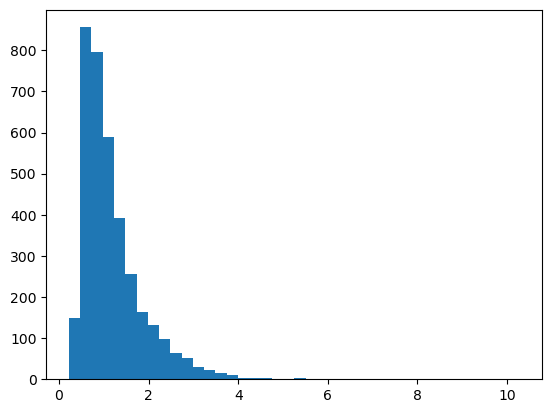

In [36]:
# Avg Acid/Alc+Sugar Distribution
plt.hist(train_s.acid_alc_sugar, bins=40)
plt.show()

**Right-Skewed**

**Mann Whitney**

In [37]:
train_s.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red,avg_acid,alc_sugar,acid_alc_sugar,acid_chlor
2002,0.290598,0.072,0.210843,0.015337,0.058431,0.323077,0.410541,0.115981,0.488189,0.264045,0.449275,6,0.0,0.65502,0.43784,0.822824,3.271348
2873,0.136752,0.104,0.192771,0.015337,0.055092,0.284615,0.246879,0.039566,0.385827,0.404494,0.637681,8,0.0,0.65502,0.43784,0.442584,2.623034
4636,0.196581,0.344,0.150602,0.016871,0.060100,0.292308,0.474341,0.091156,0.425197,0.196629,0.371981,5,0.0,0.65502,0.43784,1.184999,3.833509
3,0.256410,0.120,0.192771,0.121166,0.076795,0.353846,0.499307,0.158650,0.354331,0.101124,0.275362,6,0.0,0.65502,0.43784,0.956942,2.470577
2169,0.273504,0.088,0.180723,0.187117,0.068447,0.365385,0.618585,0.216835,0.314961,0.151685,0.159420,7,0.0,0.65502,0.43784,1.043135,2.640602


In [38]:
train_s.acid_alc_sugar.mean()

1.176484585956054

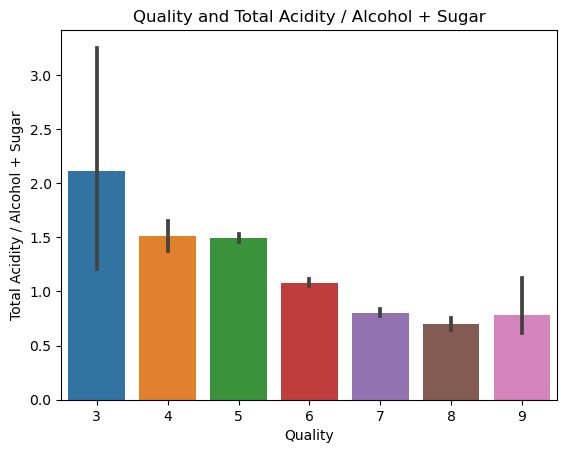

In [39]:
sns.barplot(y=train_s.acid_alc_sugar, x=train_s.quality)
plt.ylabel('Total Acidity / Alcohol + Sugar')
plt.xlabel('Quality')
plt.title('Quality and Total Acidity / Alcohol + Sugar')
plt.show()

### Stats Test

In [40]:
# Mann Whitney
x = train_s[train_s['quality'] >=  6]['acid_alc_sugar']
y = train_s[train_s['quality'] < 6]['acid_alc_sugar']

t, p = stats.mannwhitneyu(x,y)
print('Mann Whitney Test Results')
print('---------------------------')
print(f'T-statistic: {round(t,2)}')
print(f'P-value: {p}')

Mann Whitney Test Results
---------------------------
T-statistic: 783146.0
P-value: 2.140892483576418e-134


In [60]:
# Spearmans
corr, p = stats.spearmanr(train_s.acid_alc_sugar, train_s.quality)
print("Spearman's R Test Results")
print('--------------------------')
print(f'Correlation: {round(corr,2)}')
print(f'P-value: {p}')

Spearman's R Test Results
--------------------------
Correlation: -0.46
P-value: 1.15036803527409e-186


## Q2. White and red wines’ quality is different

In [42]:
redwine = train_s[train_s['color_red'] == 1]

<AxesSubplot:xlabel='color_red', ylabel='count'>

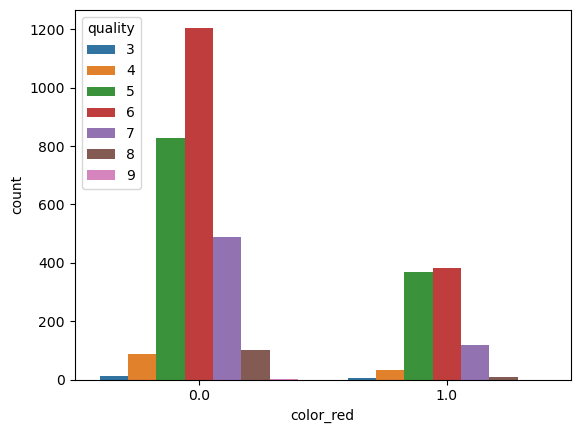

In [43]:
sns.countplot(x=train_s['color_red'], hue=train_s['quality'], data=train_s)

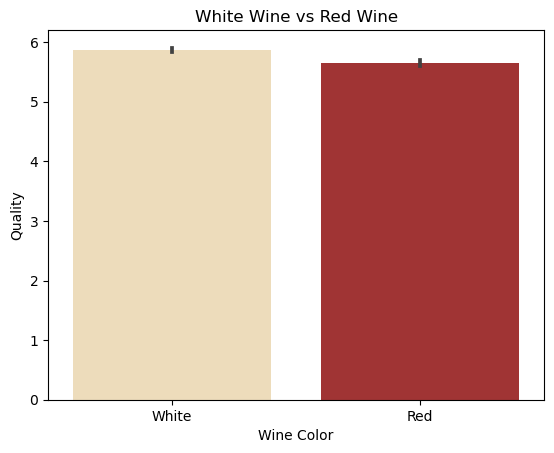

In [44]:
ax = sns.barplot(x='color_red', y='quality', data=train_s, palette=['wheat','firebrick'])
ax.set_xticklabels(['White','Red'])
plt.xlabel('Wine Color')
plt.ylabel('Quality')
plt.title('White Wine vs Red Wine')
plt.show()


In [45]:
train_s.color_red

2002    0.0
2873    0.0
4636    0.0
3       0.0
2169    0.0
       ... 
2056    0.0
1149    0.0
6432    1.0
2775    0.0
410     0.0
Name: color_red, Length: 3637, dtype: float64

### Stats Test

**Chi Square**

In [46]:
red = train_s['color_red'] == 1

qlt = train_s['quality']


In [47]:
# Crosstab
rw = pd.crosstab(qlt,red, colnames=['Red Wine'])
rw

Red Wine,False,True
quality,,
3,13,4
4,87,34
5,826,370
6,1206,382
7,487,117
8,100,8
9,3,0


In [48]:
chi, p, degf, expected = stats.chi2_contingency(rw)
print('Chi-square Test Results')
print('-----------------------')
print(f'Chi value: {round(chi,2)}')
print(f'p-value: {p}')

Chi-square Test Results
-----------------------
Chi value: 52.64
p-value: 1.386735341442881e-09


## The proportion of acid to chlorides affects quality

In [49]:
#train_s.drop(index=[2631,5735,5734], inplace=True)

In [50]:
train_s.sort_values(by='acid_chlor', ascending=False).head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red,avg_acid,alc_sugar,acid_alc_sugar,acid_chlor
2631,0.213675,0.160,0.168675,0.027607,0.000000,0.269231,0.260749,0.062452,0.409449,0.095506,0.536232,7,0.0,0.65502,0.43784,0.641258,inf
5735,0.213675,0.160,0.168675,0.027607,0.000000,0.269231,0.260749,0.062452,0.409449,0.095506,0.536232,7,1.0,0.65502,0.43784,0.641258,inf
5734,0.213675,0.160,0.168675,0.027607,0.000000,0.269231,0.260749,0.062452,0.409449,0.095506,0.536232,7,1.0,0.65502,0.43784,0.641258,inf
3901,0.051282,0.456,0.072289,0.007669,0.001669,0.023077,0.011096,0.097750,0.456693,0.078652,0.797101,4,0.0,0.65502,0.43784,0.480113,115.721051
2578,0.136752,0.176,0.162651,0.016871,0.003339,0.338462,0.271845,0.033359,0.519685,0.191011,0.666667,7,0.0,0.65502,0.43784,0.463669,47.461040


In [51]:
# Dropping INF values
train_s = train_s[train_s['chlorides'] != 0]

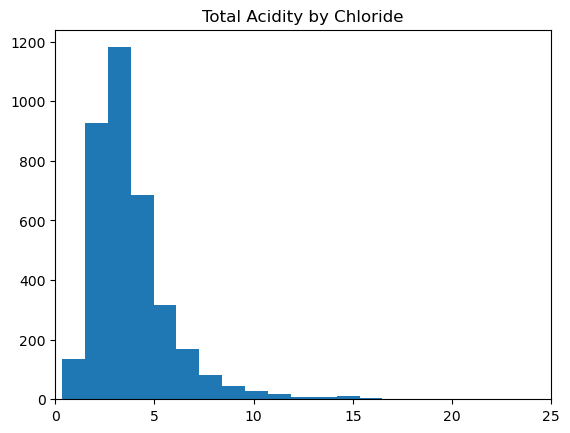

In [52]:
plt.hist(train_s.acid_chlor, bins=100)
plt.title('Total Acidity by Chloride')
plt.xlim(0,25)

plt.show()

**Right-Skewed, Spearmans**

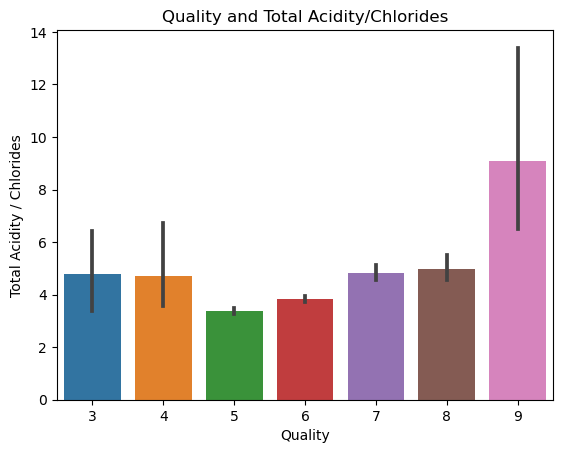

In [53]:
sns.barplot(y=train_s.acid_chlor, x=train_s.quality)
plt.ylabel('Total Acidity / Chlorides')
plt.xlabel('Quality')
plt.title('Quality and Total Acidity/Chlorides')
plt.show()

### Stats Test

In [54]:
# Spearmans
stats.spearmanr(train_s.acid_chlor, train_s.quality)
print("Spearman's R Test Results")
print('--------------------------')
print(f'Correlation: {round(chi,2)}')
print(f'P-value: {p}')

Spearman's R Test Results
--------------------------
Correlation: 52.64
P-value: 1.386735341442881e-09


## Q4. Density affects the quality of wine

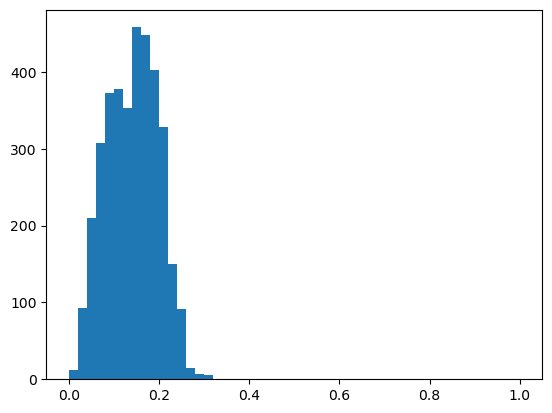

In [55]:
plt.hist(train_s.density, bins=50)
plt.show()

**T-Test or Pearsons**

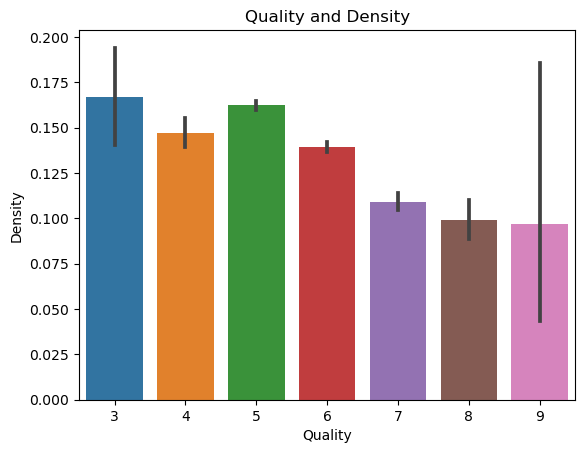

In [56]:
sns.barplot(y=train_s.density, x=train_s.quality)
plt.ylabel('Density')
plt.xlabel('Quality')
plt.title('Quality and Density')
plt.show()

In [57]:
train.shape

(3637, 13)

### Stats Test Q4

In [58]:
# T-test
x = train_s[train_s['quality'] >=  6]['density']
y = train_s[train_s['quality'] < 6]['density']

stats.ttest_ind(x, y)

Ttest_indResult(statistic=-16.153397190181707, pvalue=9.753474353348269e-57)

In [59]:
# Pearsons
stats.pearsonr(train_s.acid_alc_sugar, train_s.quality)
print("Pearson's R Test Results")
print('-------------------------')
print(f'T-statistic: {round(chi,2)}')
print(f'P-value: {p}')

Pearson's R Test Results
-------------------------
T-statistic: 52.64
P-value: 1.386735341442881e-09


In [61]:
stats.pearsonr(train_s.acid_alc_sugar, train_s.quality)

PearsonRResult(statistic=-0.3798245953060672, pvalue=4.657148676318004e-125)

In [62]:
stats.spearmanr(train_s.acid_chlor, train_s.quality)

SpearmanrResult(correlation=0.2067942033522045, pvalue=2.159433445778997e-36)

In [63]:
train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color_red'],
      dtype='object')